In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

## Optimizing parameters

In [24]:
eta = 0.1

def f(x):
    return torch.pow((x - 2.0), 2)

x_param = torch.nn.Parameter(torch.tensor([3.5]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=eta)

for epoch in range(60):
    optimizer.zero_grad()
    loss_incurred = f(x_param)
    loss_incurred.backward()
    optimizer.step()

print(x_param.data)

tensor([2.0000])


## Loading dataset objects

In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


In [16]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = np.array(X)
        self.y = np.array(y)

    def __getitem__(self, index):
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets
    
    def __len__(self):
        return self.X.shape[0]

dataset = SimpleDataset(X, y)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


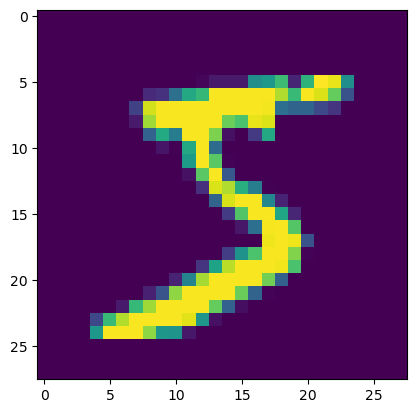

In [21]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape)
print("Label of index 0: ", label)
plt.imshow(example.reshape((28, 28)))

In [23]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing
